In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print(sns.__version__)

0.9.0


In [5]:
bands = ["B1","B2","B3","B4","B5","B6"]
feats = ["mean","stdev","min","max"]
reduced_feats = ["mean","stdev"]



# Read in the stacked data

In [9]:
result = pd.read_csv('FullStacked_data.csv')

# Generate Global_Statistics

In [10]:
global_stats = result.describe()

# some basic visualizations of the value distributions

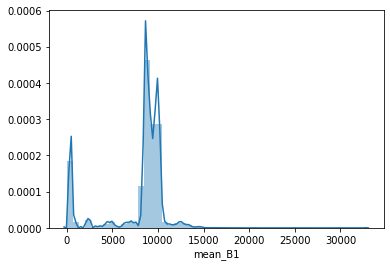

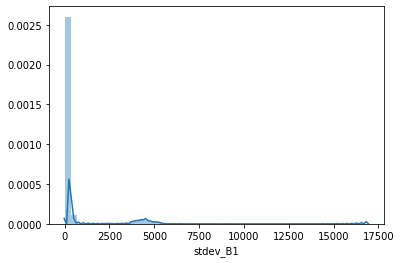

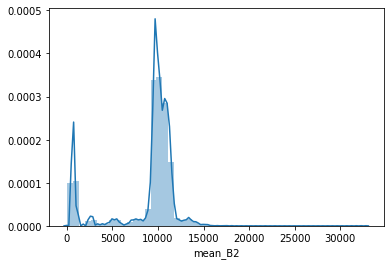

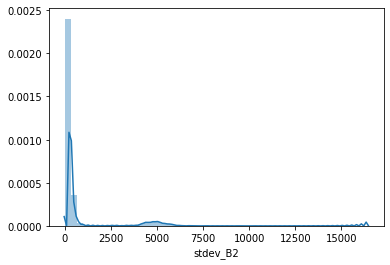

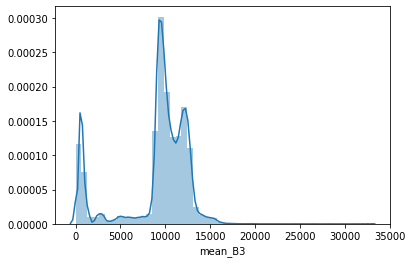

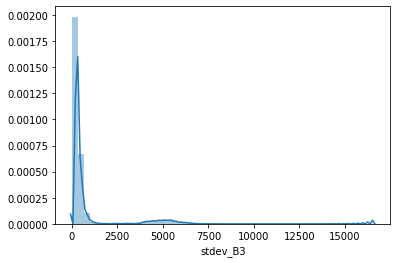

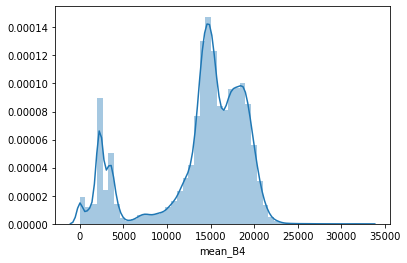

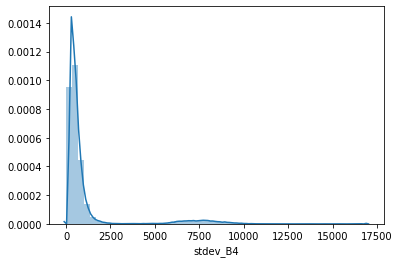

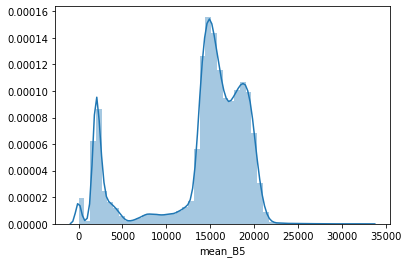

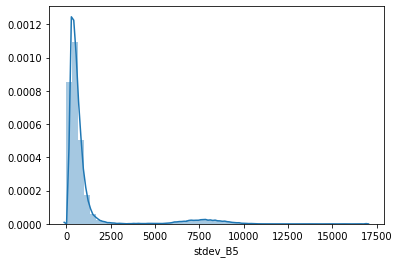

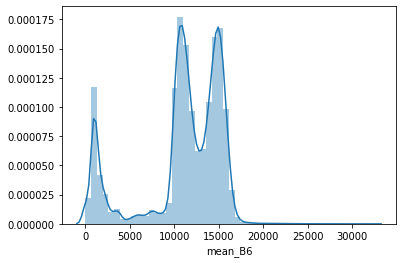

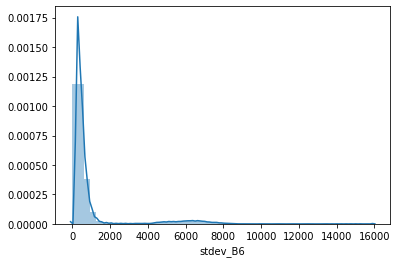

In [11]:
 # Walk the Bands (B1-B6)

for b in bands:
    for f in reduced_feats: # Combine with features
        data_key = "_".join([f,b])  # build up the key
        sns.distplot(result[data_key])
        plt.show()

---

# Pull Apart, Burn vs Non-Burn

In [12]:
result.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
OBJECTID,1,1,1,1,1
YrMo,1983_8,1984_9,1985_4,1985_9,1986_3
mean_B1,1712.5,1816.94,1723.62,1940.44,1908.44
stdev_B1,3687.55,3907.93,3710.42,4173.41,4105.39
min_B1,0,0,0,0,0
max_B1,9785,10046,9773,10694,10604
mean_B2,1931.81,2020.5,1918.06,2124.06,2118.5
stdev_B2,4165.97,4349.11,4129.87,4570.86,4557.88
min_B2,0,0,0,0,0


In [13]:
result['isBurnt'].value_counts()

1    120546
2     14400
Name: isBurnt, dtype: int64

# This normalizes the data to [0,1] ranges.

In [14]:
normalized = pd.DataFrame({'OBJECTID': result['OBJECTID'],
                           'isBurnt':  result['isBurnt'],
                           'YrMo':     result['YrMo']})

for b in bands:
    for f in reduced_feats: # Combine with features
        data_key = "_".join([f,b])  # build up the key
        dk_min = global_stats[data_key]['min']
        dk_max = global_stats[data_key]['max']
        print("Key {} : Range ({},{})".format(data_key,dk_min, dk_max))
        normalized[data_key] = np.interp( result[data_key], 
                                            (dk_min, dk_max), 
                                            (0, 1))
normalized.head()

Key mean_B1 : Range (0.0,32767.0)
Key stdev_B1 : Range (0.0,16920.807)
Key mean_B2 : Range (0.0,32767.0)
Key stdev_B2 : Range (0.0,16435.209)
Key mean_B3 : Range (0.0,32767.0)
Key stdev_B3 : Range (0.0,16579.73)
Key mean_B4 : Range (0.0,32767.0)
Key stdev_B4 : Range (0.0,16920.807)
Key mean_B5 : Range (0.0,32767.0)
Key stdev_B5 : Range (0.0,16920.807)
Key mean_B6 : Range (0.0,32296.125)
Key stdev_B6 : Range (0.0,15936.333)


,OBJECTID,isBurnt,YrMo,mean_B1,stdev_B1,mean_B2,stdev_B2,mean_B3,stdev_B3,mean_B4,stdev_B4,mean_B5,stdev_B5,mean_B6,stdev_B6
0,1,1,1983_8,0.052263,0.217930,0.058956,0.253478,0.058468,0.249245,0.101175,0.421233,0.091317,0.380508,0.073219,0.320136
1,1,1,1984_9,0.055450,0.230954,0.061663,0.264622,0.063557,0.270510,0.092650,0.385738,0.099294,0.413446,0.080333,0.350196
2,1,1,1985_4,0.052602,0.219282,0.058536,0.251282,0.058306,0.248447,0.104928,0.436881,0.093955,0.391641,0.072954,0.318808
3,1,1,1985_9,0.059219,0.246644,0.064823,0.278114,0.069399,0.295116,0.084286,0.350939,0.104678,0.435930,0.088116,0.384040
4,1,1,1986_3,0.058243,0.242624,0.064653,0.277324,0.070790,0.301089,0.088204,0.367293,0.110902,0.461926,0.091691,0.399889


# Write out the normalized bands

In [15]:
normalized.to_csv('normalized_global_bands_mean_stdev.csv')

In [16]:
nonburn = normalized[ normalized['isBurnt'] == 1]
burn = normalized[ normalized['isBurnt'] == 2]


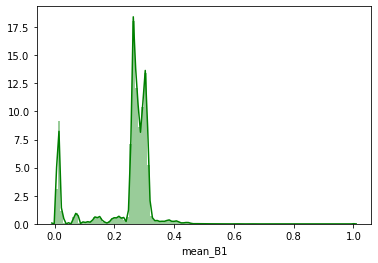

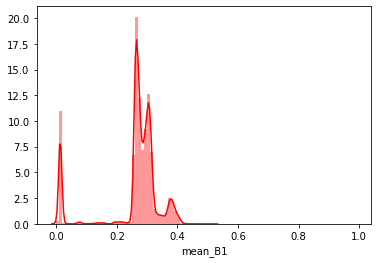

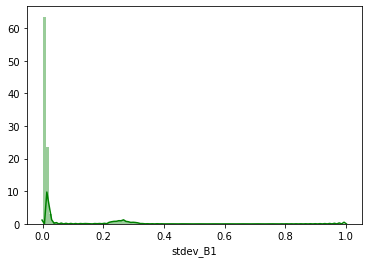

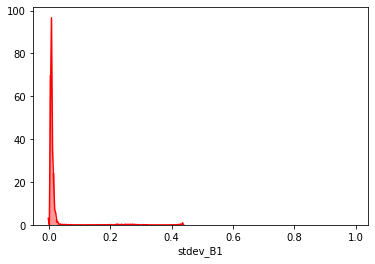

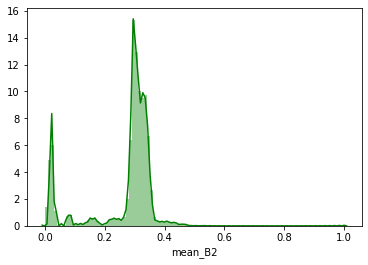

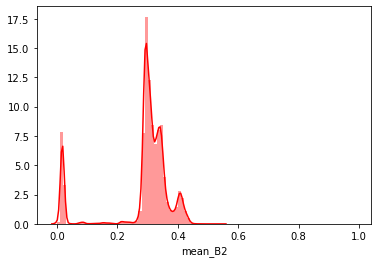

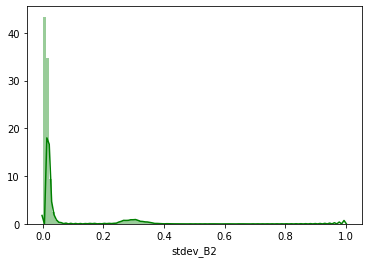

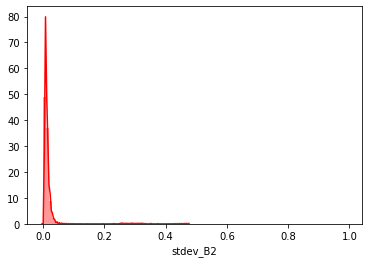

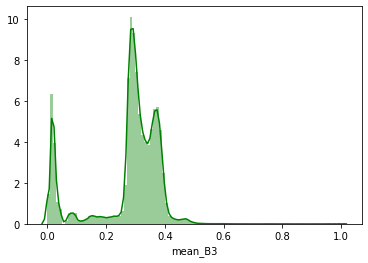

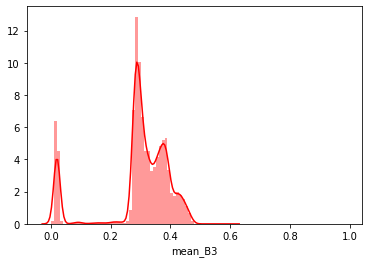

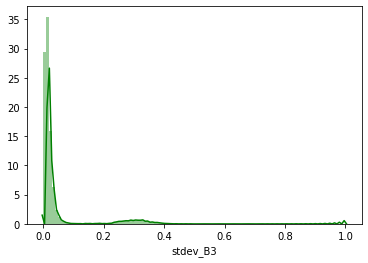

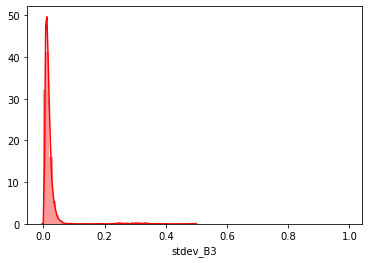

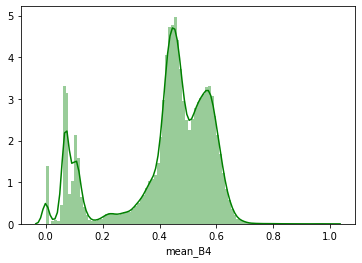

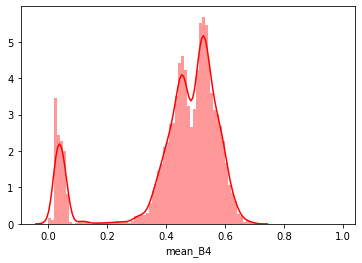

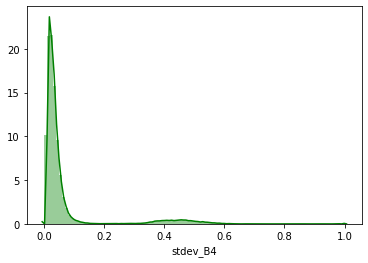

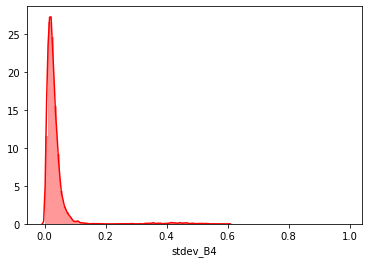

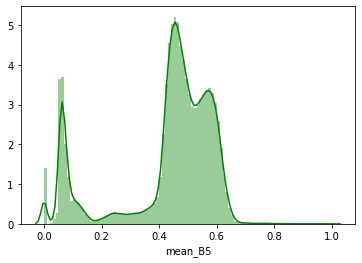

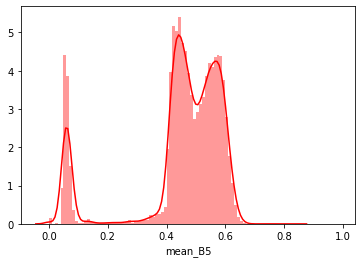

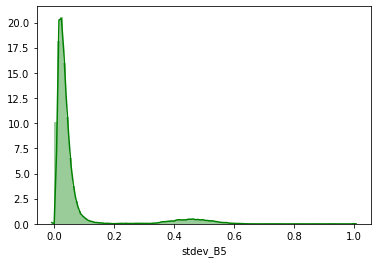

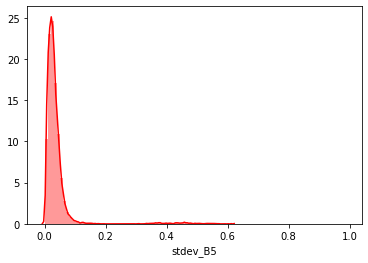

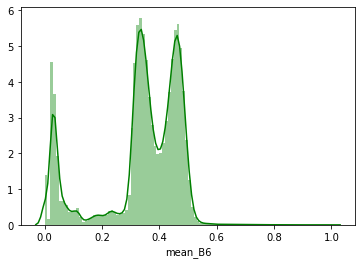

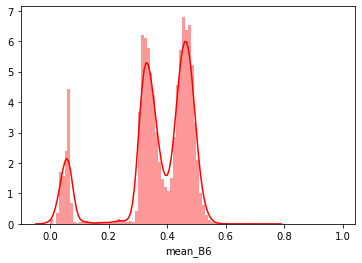

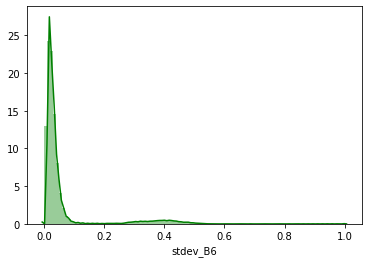

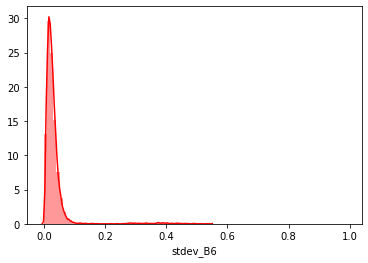

In [17]:
bins = [x for x in np.arange(0,1,0.01)]

for b in bands:
    for f in reduced_feats: # Combine with features
        data_key = "_".join([f,b])  # build up the key
        sns.distplot(nonburn[data_key], color='green', bins=bins)
        plt.show()
        sns.distplot(burn[data_key], color='red', bins=bins)
        plt.show()

---